In [22]:
from super_gradients.training import dataloaders
from super_gradients.training.dataloaders.dataloaders import coco_detection_yolo_format_train, coco_detection_yolo_format_val

In [23]:
from IPython.display import clear_output
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback

In [24]:
from super_gradients.training import models

In [25]:
from super_gradients.training import Trainer

In [26]:
CHECKPOINT_DIR = 'D://PROJECTS/ALL_PROJECTS/SPACE_HACKATHON_ppt/model_training/inside/checkpoints'
trainer = Trainer(experiment_name='yolo_nas', ckpt_root_dir=CHECKPOINT_DIR)

In [27]:

dataset_params = {
    'data_dir':'D://PROJECTS/ALL_PROJECTS/SPACE_HACKATHON_ppt/model_training/inside',
    'train_images_dir':'D://PROJECTS/ALL_PROJECTS/SPACE_HACKATHON_ppt/model_training/inside/data/train/images',
    'train_labels_dir':'D://PROJECTS/ALL_PROJECTS/SPACE_HACKATHON_ppt/model_training/inside/data/train/labels',
    'val_images_dir':'D://PROJECTS/ALL_PROJECTS/SPACE_HACKATHON_ppt/model_training/inside/data/valid/images',
    'val_labels_dir':'D://PROJECTS/ALL_PROJECTS/SPACE_HACKATHON_ppt/model_training/inside/data/valid/labels',
    'test_images_dir':'D://PROJECTS/ALL_PROJECTS/SPACE_HACKATHON_ppt/model_training/inside/data/test/images',
    'test_labels_dir':'D://PROJECTS/ALL_PROJECTS/SPACE_HACKATHON_ppt/model_training/inside/data/test/labels',
    'classes':  ['Airport', 'Dam', 'Dugwell', 'Electric Substation', 'Lake', 'Solar Panel', 'Stadium', 'Windmill']
}

In [28]:
from IPython.display import clear_output

train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['train_images_dir'],
        'labels_dir': dataset_params['train_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':4,
        'num_workers':0
    }
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['val_images_dir'],
        'labels_dir': dataset_params['val_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':4,
        'num_workers':0
    }
)

test_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['test_images_dir'],
        'labels_dir': dataset_params['test_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':4,
        'num_workers':0
    }
)

clear_output()

Caching annotations: 100%|██████████| 292/292 [00:00<00:00, 900.79it/s]


In [38]:
 best_prev_model = models.get('yolo_nas_m',
                        num_classes=len(dataset_params['classes']),
                        checkpoint_path="D:\PROJECTS\ALL_PROJECTS\SPACE_HACKATHON_ppt\model_training\INFERENCE_8 FEATURES\ckpt_best.pth")
# this part of code is used to load the model from the checkpoints 

[2024-01-17 19:01:14] INFO - checkpoint_utils.py - Successfully loaded model weights from D:\PROJECTS\ALL_PROJECTS\SPACE_HACKATHON_ppt\model_training\INFERENCE_8 FEATURES\ckpt_best.pth EMA checkpoint.


In [39]:
train_params = {
    # ENABLING SILENT MODE
    'silent_mode': False,
    "average_best_models":True,
    "warmup_mode": "linear_epoch_step",
    "warmup_initial_lr": 1e-6,
    "lr_warmup_epochs": 3,
    "initial_lr": 5e-4,
    "lr_mode": "cosine",
    "cosine_final_lr_ratio": 0.1,
    "optimizer": "Adam",
    "optimizer_params": {"weight_decay": 0.0001},
    "zero_weight_decay_on_bias_and_bn": True,
    "ema": True,
    "ema_params": {"decay": 0.9, "decay_type": "threshold"},
    # ONLY TRAINING FOR 10 EPOCHS FOR THIS EXAMPLE NOTEBOOK
    "max_epochs":80,
    "mixed_precision": True,
    "loss": PPYoloELoss(
        use_static_assigner=False,
        # NOTE: num_classes needs to be defined here
        num_classes=len(dataset_params['classes']),
        reg_max=16
    ),
    "valid_metrics_list": [
        DetectionMetrics_050(
            score_thres=0.1,
            top_k_predictions=300,
            # NOTE: num_classes needs to be defined here
            num_cls=len(dataset_params['classes']),
            normalize_targets=True,
            post_prediction_callback=PPYoloEPostPredictionCallback(
                score_threshold=0.01,
                nms_top_k=1000,
                max_predictions=300,
                nms_threshold=0.7
            )
        )
    ],
    "metric_to_watch": 'mAP@0.50'
}


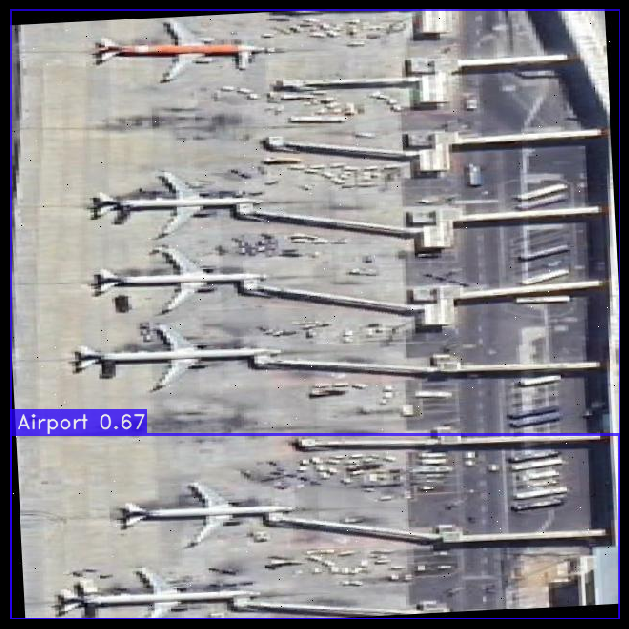

In [57]:

best_prev_model.predict('C:/Users/ravit/Downloads/infer_space/a1.jpg').show()

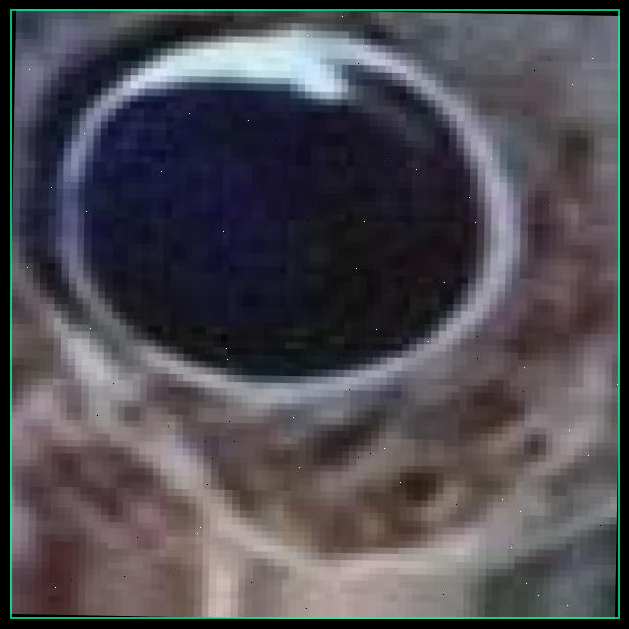

In [60]:

best_prev_model.predict('C:/Users/ravit/Downloads/infer_space/dw3.jpg').show()

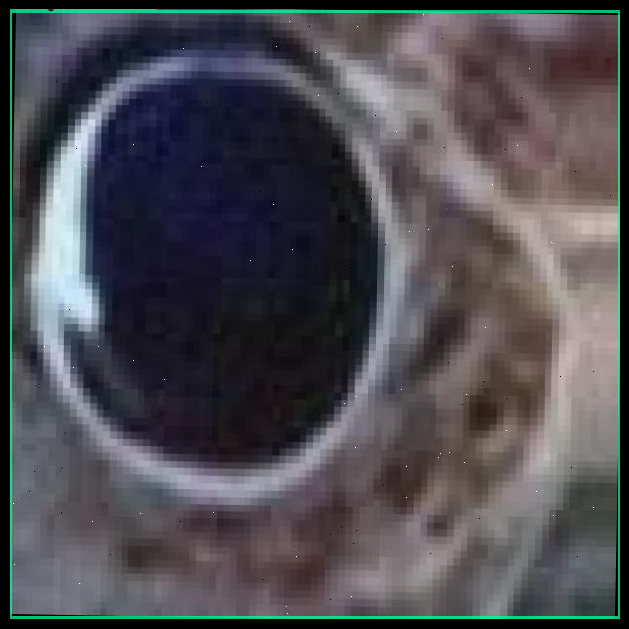

In [61]:

best_prev_model.predict('C:/Users/ravit/Downloads/infer_space/dw2.jpg').show()

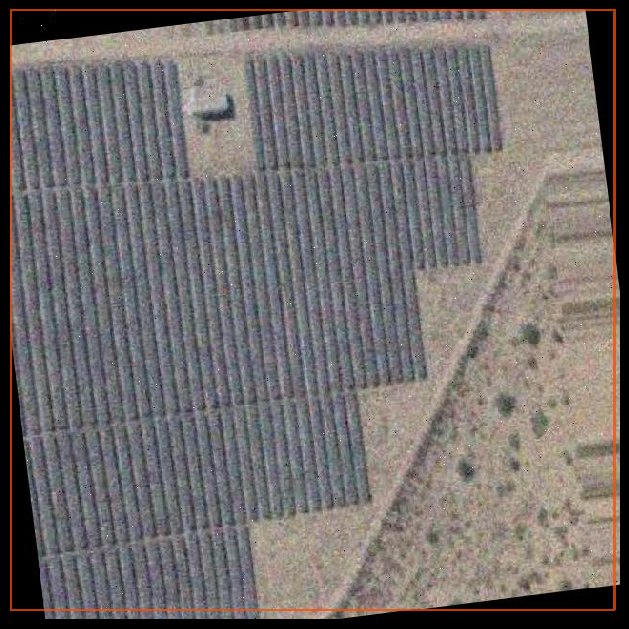

In [62]:

best_prev_model.predict('C:/Users/ravit/Downloads/infer_space/sp.jpg').show()

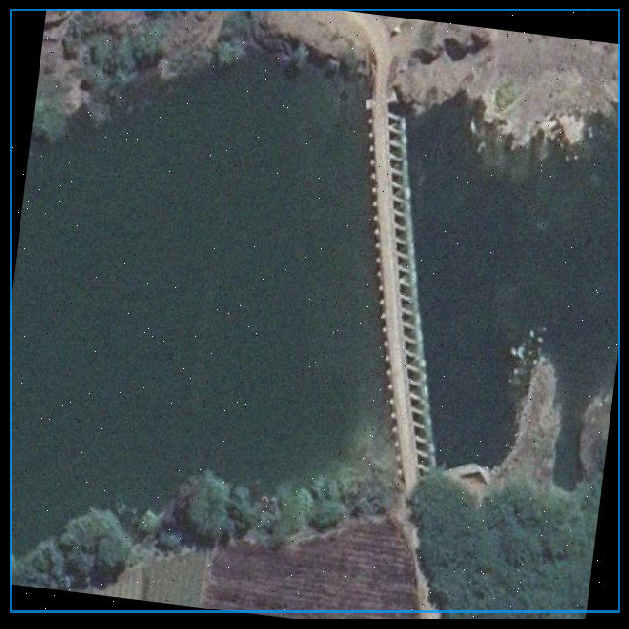

In [112]:
 best_prev_model.predict('C:/Users/ravit/Downloads/infer_space/dm.jpg').show()

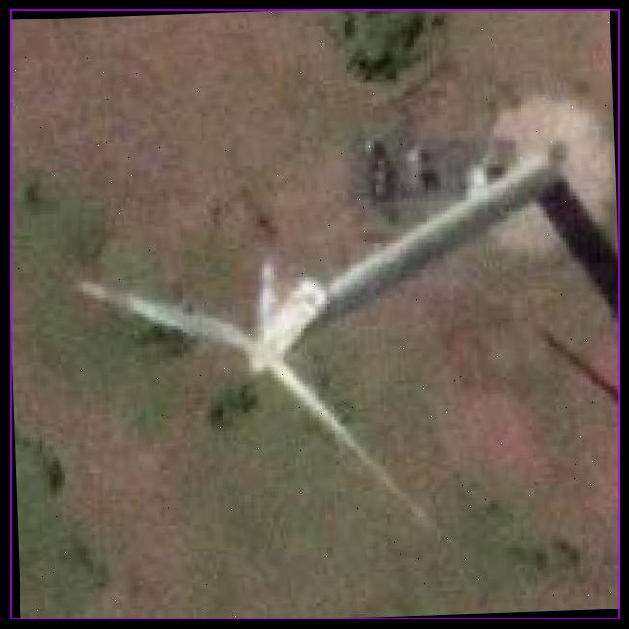

In [114]:
 best_prev_model.predict('C:/Users/ravit/Downloads/infer_space/wm.jpg').show()

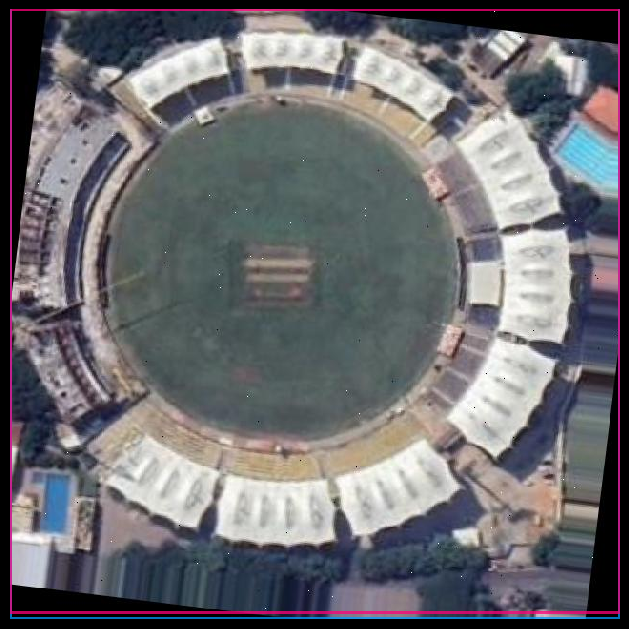

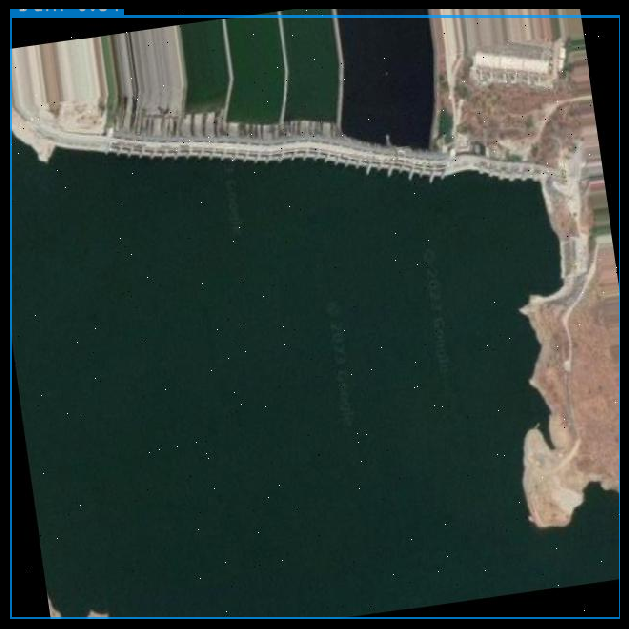

In [119]:
 best_prev_model.predict('C:/Users/ravit/Downloads/infer_space/dm2.jpg').show()

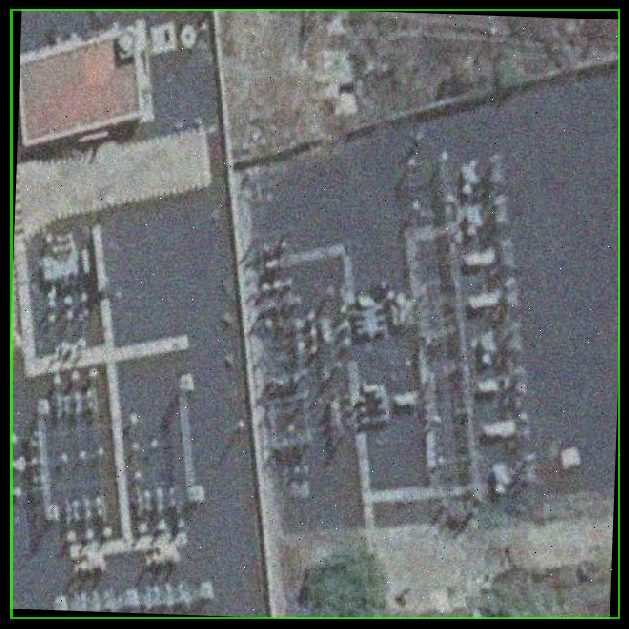

In [120]:
 best_prev_model.predict('C:/Users/ravit/Downloads/infer_space/es.jpg').show()

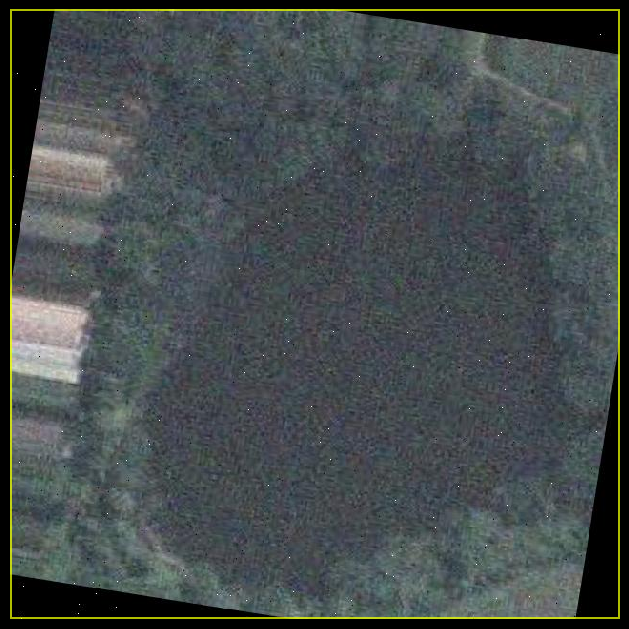

In [121]:
 best_prev_model.predict('C:/Users/ravit/Downloads/infer_space/lk1.jpg').show()